<a href="https://colab.research.google.com/github/TechRoC/Used_Car_Price_Prediction/blob/main/Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import matplotlib.pyplot as plt
%matplotlib inline
 
 
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor , AdaBoostRegressor , GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score , train_test_split
 
 
from sklearn.externals import joblib
import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
data = joblib.load('/content/drive/My Drive/cars_onehot_data1.pkl')

In [ ]:
data = data[[c for c in data if c not in ['priceUSD']] + ['priceUSD']]
data

,make,model,year,mileage(kilometers),volume(cm3),color,segment,condition_with damage,condition_with mileage,fuel_type_petrol,transmission_mechanics,drive_unit_front-wheel drive,drive_unit_part-time four-wheel drive,drive_unit_rear drive,priceUSD
0,405,196,1993.0,960015.0,2000.0,5468,4,0,1,1,1,1,0,0,565.0
4,888,323,2002.0,413000.0,2200.0,869,4,1,0,0,1,1,0,0,2450.0
5,888,163,2016.0,148000.0,1600.0,5468,7,0,1,0,1,1,0,0,18900.0
6,495,137,1997.0,378194.9,2000.0,1621,4,0,1,1,0,1,0,0,2000.0
7,4413,777,2002.0,245000.0,1900.0,1621,3,0,1,0,0,1,0,0,5950.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39990,415,126,2014.0,134000.0,1600.0,2078,4,0,1,1,0,1,0,0,14990.0
39991,786,175,1999.0,235000.0,1400.0,869,3,0,1,1,1,1,0,0,2100.0
39992,2368,182,2009.0,270000.0,3000.0,5468,6,0,1,0,0,0,0,0,15250.0
39994,2368,494,2008.0,278000.0,2000.0,3809,4,0,1,0,1,1,0,0,9700.0


In [ ]:
y = data['priceUSD']
X = data.drop(['priceUSD'], axis=1)

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [ ]:
model_decision_tree = DecisionTreeRegressor(random_state=32)
model_decision_tree.fit(X_train,y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=32, splitter='best')

In [ ]:
y_pred = model_decision_tree.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error,r2_score
rmse  = np.sqrt(mean_squared_error(y_pred,y_test))
r2score = r2_score(y_pred,y_test)

In [ ]:
print(rmse,r2score)

1672.5945988413243 0.9020426845044616


In [ ]:
listy = []
listy.append({'DecisionTreeRegressor':{"RMSE":rmse,"r2score":r2score}})

In [ ]:
model1 = ExtraTreesRegressor(random_state=32)
model1.fit(X_train,y_train)
y_pred = model1.predict(X_test)
rmse  = np.sqrt(mean_squared_error(y_pred,y_test))
r2score = r2_score(y_pred,y_test)
print(rmse,r2score)
listy.append({'ExtraTreesRegressor':{"RMSE":rmse,"r2score":r2score}})

1349.7784671108977 0.9329119484418653


[0.022904766435177804, 0.02354969852970858, 0.5727756010981939, 0.03241173013073465, 0.04432708397380493, 0.009629747168834224, 0.06887647279590899, 0.0012473739740988775, 0.0018402765308165423, 0.022454496907676365, 0.13938322397692268, 0.054595360848268396, 0.0017773257836260228, 0.004226841846228169]
[0.022904766435177804, 0.02354969852970858, 0.5727756010981939, 0.03241173013073465, 0.04432708397380493, 0.009629747168834224, 0.06887647279590899, 0.0030876505049154197, 0.022454496907676365, 0.13938322397692268, 0.06059952847812258]


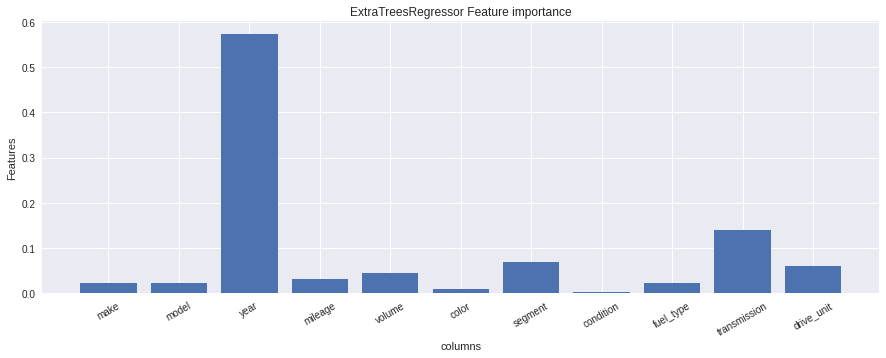

<Figure size 576x396 with 0 Axes>

In [ ]:
d = list(model1.feature_importances_)
new = []
val=val1 = 0
for i in range(len(d)):
  if i == 7 or i == 8:
    val += d[i]
  elif i >= 11:
    val1 += d[i]
  else:
    new.append(d[i])
new.insert(7,val)
new.append(val1)
col = ['make',	'model',	'year',	'mileage'	,'volume',	'color',	'segment','condition','fuel_type','transmission','drive_unit']
b = list(data.columns)
#cs = cm.Set1(np.arange(len(col)))
print(d)
print(new)

from matplotlib import  cm
plt.figure(figsize=(15,5))
plt.style.use('seaborn')
plt.bar(col,new )
plt.xticks(rotation=(30))
plt.xlabel('columns')
plt.ylabel('Features')
plt.title('ExtraTreesRegressor Feature importance')
plt.show()
plt.savefig('best_model2.png')


In [ ]:
model2 = RandomForestRegressor(random_state=32)
model2.fit(X_train,y_train)
y_pred = model2.predict(X_test)
rmse  = np.sqrt(mean_squared_error(y_pred,y_test))
r2score = r2_score(y_pred,y_test)
print(rmse,r2score)
listy.append({'RandomForestRegressor':{"RMSE":rmse,"r2score":r2score}})

1272.320067541076 0.9397507368272361


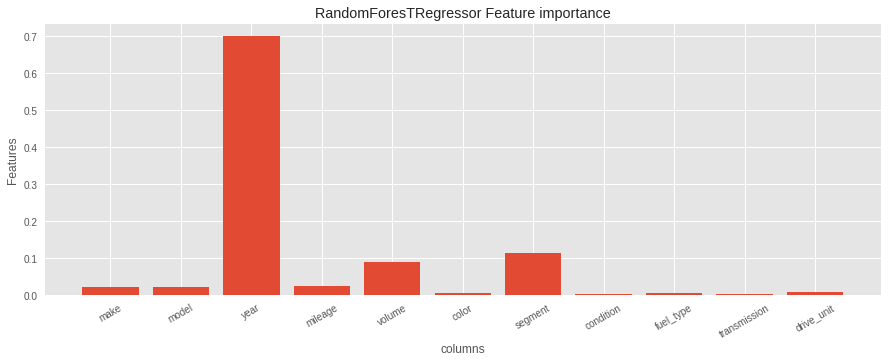

<Figure size 576x396 with 0 Axes>

In [ ]:
d = list(model2.feature_importances_)
new = []
val=val1 = 0
for i in range(len(d)):
  if i == 7 or i == 8:
    val += d[i]
  elif i >= 11:
    val1 += d[i]
  else:
    new.append(d[i])
new.insert(7,val)
new.append(val1)
col = ['make',	'model',	'year',	'mileage'	,'volume',	'color',	'segment','condition','fuel_type','transmission','drive_unit']
b = list(data.columns)
#cs = cm.Set1(np.arange(len(col)))


from matplotlib import  cm
plt.figure(figsize=(15,5))
plt.style.use('ggplot')
plt.bar(col,new )
plt.xticks(rotation=(30))
plt.xlabel('columns')
plt.ylabel('Features')
plt.title('RandomForesTRegressor Feature importance')
plt.show()
plt.savefig('best_model2.png')

In [ ]:
model3 = AdaBoostRegressor(random_state=32)
model3.fit(X_train,y_train)
y_pred = model3.predict(X_test)
rmse  = np.sqrt(mean_squared_error(y_pred,y_test))
r2score = r2_score(y_pred,y_test)
print(rmse,r2score)
listy.append({'AdaBoostRegressor':{"RMSE":rmse,"r2score":r2score}})

2788.364628053206 0.6872537639746863


In [ ]:
model4 = GradientBoostingRegressor(random_state=32)
model4.fit(X_train,y_train)
y_pred = model4.predict(X_test)
rmse  = np.sqrt(mean_squared_error(y_pred,y_test))
r2score = r2_score(y_pred,y_test)
print(rmse,r2score)
listy.append({'GradientBoostingRegressor':{"RMSE":rmse,"r2score":r2score}})

1483.5286613140586 0.9124441280861042


In [ ]:


model5 = XGBRegressor(random_state=32)
model5.fit(X_train,y_train)
y_pred = model5.predict(X_test)
rmse  = np.sqrt(mean_squared_error(y_pred,y_test))
r2score = r2_score(y_pred,y_test)
print(rmse,r2score)
listy.append({'XGBRegressor':{"RMSE":rmse,"r2score":r2score}})

[08:14:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
1488.0460776054783 0.9122010066521857


In [ ]:
listy

[{'DecisionTreeRegressor': {'RMSE': 1672.5945988413243,
   'r2score': 0.9020426845044616}},
 {'ExtraTreesRegressor': {'RMSE': 1349.7784671108977,
   'r2score': 0.9329119484418653}},
 {'RandomForestRegressor': {'RMSE': 1272.320067541076,
   'r2score': 0.9397507368272361}},
 {'AdaBoostRegressor': {'RMSE': 2788.364628053206,
   'r2score': 0.6872537639746863}},
 {'GradientBoostingRegressor': {'RMSE': 1483.5286613140586,
   'r2score': 0.9124441280861042}},
 {'XGBRegressor': {'RMSE': 1488.0460776054783, 'r2score': 0.9122010066521857}}]

In [ ]:
def change(val):
  val = val * 100
  val = round(val,2)
  return val
d = []
m = []
for i in listy:
  for j in i.keys():
    m.append(j)
    d.append(i[j])
model_check = pd.DataFrame(d)
model = pd.DataFrame(m,columns=['Models'])
DataFrame = pd.merge(model,model_check, on=model.index, how = 'outer')
DataFrame = DataFrame.drop('key_0',axis=1)
DataFrame['Accuracy'] = DataFrame['r2score'].apply(change)
DataFrame

,Models,RMSE,r2score,Accuracy
0,DecisionTreeRegressor,1672.594599,0.902043,90.20
1,ExtraTreesRegressor,1349.778467,0.932912,93.29
2,RandomForestRegressor,1272.320068,0.939751,93.98
3,AdaBoostRegressor,2788.364628,0.687254,68.73
4,GradientBoostingRegressor,1483.528661,0.912444,91.24
5,XGBRegressor,1488.046078,0.912201,91.22


In [ ]:
joblib.dump(model_decision_tree,'/content/DecisionTreeRegressor.pkl')
joblib.dump(model1,'/content/ExtraTreesRegressor.pkl')
joblib.dump(model2,'/content/RandomForestRegressor.pkl')
joblib.dump(model3,'/content/AdaBoostRegressor.pkl')
joblib.dump(model4,'/content/GradientBoostingRegressor.pkl')
joblib.dump(model5,'/content/XGBRegressor.pkl')

['/content/XGBRegressor.pkl']

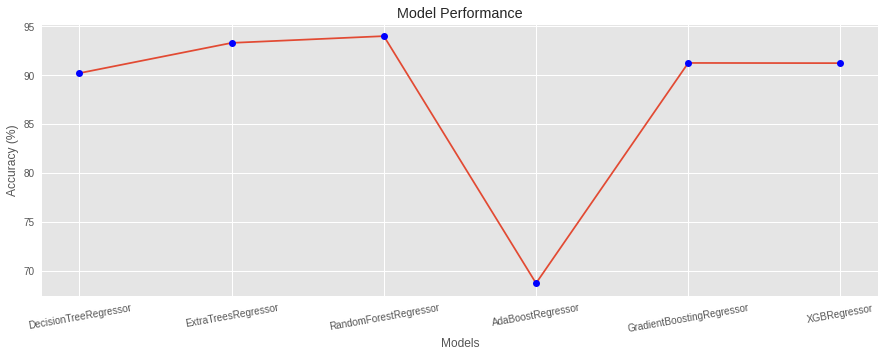

<Figure size 576x396 with 0 Axes>

In [ ]:
plt.figure(figsize=(15,5))
plt.style.use('ggplot')
plt.plot(DataFrame['Models'],DataFrame['Accuracy'], marker='o', markerfacecolor='blue')
plt.xticks(rotation=(10))
plt.xlabel('Models')
plt.ylabel('Accuracy (%)')
plt.title('Model Performance')
plt.show()
plt.savefig('model_performance.png')